In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
bd = pd.read_csv('dados_coletados10k.csv')

In [3]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Contrato                          9517 non-null   int64  
 1   Idade                             9517 non-null   int64  
 2   Sexo                              9517 non-null   object 
 3   Valor_Renda                       9517 non-null   float64
 4   UF_Cliente                        9517 non-null   object 
 5   Perc_Juros                        9517 non-null   float64
 6   Prazo_Emprestimo                  9517 non-null   int64  
 7   Data_Contratacao                  9517 non-null   object 
 8   Prazo_Restante                    9517 non-null   int64  
 9   VL_Emprestimo                     9517 non-null   float64
 10  VL_Emprestimo_ComJuros            9517 non-null   float64
 11  QT_Total_Parcelas_Pagas           9517 non-null   int64  
 12  QT_Tot

In [4]:
bd.head()

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Escolaridade,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude
0,322068935715,43,M,5800.0,SP,23.0,200,2022-08-01,193,80000.0,92000.0,15,9,1,0,DIVORCIADO,Nenhum,N,0.0,0,NaN,91759.97,7717.08,Nao
1,322068936715,22,M,2000.0,MG,20.0,100,2022-08-01,89,50000.0,57500.0,10,10,0,0,SOLTEIRO(A),NaN,N,0.0,4,103.0,53981.18,6756.59,Nao
2,322068938715,35,M,4000.0,BA,18.0,100,2022-08-01,85,100000.0,115000.0,15,5,1,0,CASADO (A),NaN,N,0.0,0,NaN,101150.02,17929.06,Nao
3,322068939715,20,M,1800.0,MG,20.0,100,2022-08-01,89,30000.0,34500.0,1,1,0,0,SOLTEIRO(A),NaN,N,0.0,13,376.0,36208.10,369.10,Sim
4,322068940715,53,M,2800.0,MG,20.0,100,2022-08-01,87,60000.0,69000.0,16,16,0,0,CASADO (A),NaN,N,0.0,0,NaN,60984.00,11845.24,Nao


In [5]:
bd.describe().T

,count,mean,std,min,25%,50%,75%,max
Contrato,9517.0,3.220782e+11,5.434161e+06,3.220689e+11,3.220733e+11,3.220785e+11,3.220826e+11,3.220876e+11
Idade,9517.0,3.873868e+01,1.267480e+01,6.000000e+00,2.900000e+01,3.700000e+01,4.600000e+01,9.100000e+01
Valor_Renda,9517.0,8.325404e+03,1.218621e+05,4.500000e+02,2.300000e+03,3.400000e+03,5.000000e+03,8.000080e+06
Perc_Juros,9517.0,1.964573e+01,3.820652e+00,7.000000e+00,1.800000e+01,2.000000e+01,2.200000e+01,2.800000e+01
Prazo_Emprestimo,9517.0,1.074253e+02,6.248880e+01,1.500000e+01,6.000000e+01,8.000000e+01,1.900000e+02,2.400000e+02
Prazo_Restante,9517.0,1.045835e+02,6.856821e+01,0.000000e+00,5.100000e+01,8.000000e+01,1.850000e+02,2.270000e+02
VL_Emprestimo,9517.0,8.188189e+04,9.413806e+04,3.500000e+03,2.000000e+04,5.000000e+04,1.000000e+05,5.000000e+05
VL_Emprestimo_ComJuros,9517.0,9.416417e+04,1.082588e+05,4.025000e+03,2.300000e+04,5.750000e+04,1.150000e+05,5.750000e+05
QT_Total_Parcelas_Pagas,9517.0,7.893139e+00,5.165751e+00,0.000000e+00,2.000000e+00,9.000000e+00,1.300000e+01,3.500000e+01
QT_Total_Parcelas_Pagas_EmDia,9517.0,4.108122e+00,4.040356e+00,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,3.500000e+01


In [6]:
bd.duplicated().sum()

np.int64(0)

In [7]:
bd.nunique()

Contrato                            9517
Idade                                 74
Sexo                                   2
Valor_Renda                          855
UF_Cliente                            27
Perc_Juros                            21
Prazo_Emprestimo                      36
Data_Contratacao                     110
Prazo_Restante                        79
VL_Emprestimo                         61
VL_Emprestimo_ComJuros                61
QT_Total_Parcelas_Pagas               24
QT_Total_Parcelas_Pagas_EmDia         24
QT_Total_Parcelas_Pagas_EmAtraso      15
Qt_Renegociacao                       10
Estado_Civil                           6
Escolaridade                           5
Possui_Patrimonio                      2
VL_Patrimonio                          3
QT_Parcelas_Atraso                    16
QT_Dias_Atraso                        15
Saldo_Devedor                       7654
Total_Pago                          7022
Possivel_Fraude                        2
dtype: int64

In [8]:
bd.isnull().sum().sort_values(ascending=False).head(24)

Escolaridade                        7105
QT_Dias_Atraso                      3594
Contrato                               0
Idade                                  0
UF_Cliente                             0
Perc_Juros                             0
Sexo                                   0
Valor_Renda                            0
Data_Contratacao                       0
Prazo_Emprestimo                       0
Prazo_Restante                         0
VL_Emprestimo                          0
QT_Total_Parcelas_Pagas_EmDia          0
QT_Total_Parcelas_Pagas_EmAtraso       0
VL_Emprestimo_ComJuros                 0
QT_Total_Parcelas_Pagas                0
Estado_Civil                           0
Qt_Renegociacao                        0
VL_Patrimonio                          0
Possui_Patrimonio                      0
QT_Parcelas_Atraso                     0
Saldo_Devedor                          0
Total_Pago                             0
Possivel_Fraude                        0
dtype: int64

In [9]:
# O melhor valor para a coluna QT_Dias_Atraso é a sua mediana

bd['QT_Dias_Atraso'].median()

np.float64(284.0)

In [10]:
bd['QT_Dias_Atraso'] = bd['QT_Dias_Atraso'].fillna((bd['QT_Dias_Atraso'].median()))

In [11]:
bd.groupby(['Sexo']).size()

Sexo
F    3811
M    5706
dtype: int64

In [12]:
bd.groupby(['UF_Cliente']).size()

UF_Cliente
AC       1
AL      79
AM       2
AP       5
BA     883
CE     248
DF      46
ES      49
GO     485
MA     403
MG    1637
MS     238
MT     137
PA     420
PB     154
PE     263
PI     104
PR     693
RJ     335
RN      78
RO      16
RR       4
RS     407
SC     298
SE      45
SP    2468
TO      19
dtype: int64

In [13]:
bd.groupby(['Escolaridade']).size()

Escolaridade
Ensino Fundamental                        18
Ensino Médio                             129
Ensino Superior                           74
Nenhum                                  2184
Pós Graduação / Mestrado / Doutorado       7
dtype: int64

In [14]:
bd.groupby(['Possui_Patrimonio']).size()

Possui_Patrimonio
N    9452
S      65
dtype: int64

In [15]:
bd.groupby(['VL_Patrimonio']).size()

VL_Patrimonio
0.0         9512
1000.0         4
100000.0       1
dtype: int64

In [16]:
bd.groupby(['Possivel_Fraude']).size()

Possivel_Fraude
Nao    5035
Sim    4482
dtype: int64

In [17]:
bd.groupby(['Estado_Civil']).size()

Estado_Civil
CASADO (A)       3027
DIVORCIADO        481
OUTRO             652
SOLTEIRO(A)      5087
UNIÃO ESTAVEL     130
VIÚVO(A)          140
dtype: int64

In [18]:
# Ajustando o Estado Civil

bd['Estado_Civil'] = bd['Estado_Civil'].replace(['NENHUM', 'UNIÃO ESTAVEL', 'SEPARADO JUDICIALMENTE', 'DIVORCIADO', 'VIÚVO(A)'], 'OUTRO')

bd.groupby(['Estado_Civil']).size()

Estado_Civil
CASADO (A)     3027
OUTRO          1403
SOLTEIRO(A)    5087
dtype: int64

In [19]:
maximo = bd['Idade'].max()
minimo = bd['Idade'].min()

print(f'Valor maximo {maximo}', '\n', f'Valor minimo {minimo}')

Valor maximo 91 
 Valor minimo 6


In [20]:
# Engenharia de atributos - Idade

bins = [0, 20, 30, 40, 50, 60, 110]
labels = ['Até 20 anos', 'De 21 a 30 anos', 'De 31 a 40 anos', 'De 41 a 50 anos', 'De 51 a 60 anos', 'Acima de 60 anos']
bd['Faixa_Etaria'] = pd.cut(bd['Idade'], bins=bins, labels=labels)
bd.groupby(['Faixa_Etaria']).size()

Faixa_Etaria
Até 20 anos          327
De 21 a 30 anos     2539
De 31 a 40 anos     2835
De 41 a 50 anos     2132
De 51 a 60 anos     1071
Acima de 60 anos     613
dtype: int64

In [21]:
maximo = bd['Valor_Renda'].max()
minimo = bd['Valor_Renda'].min()

print(f'Valor maximo {maximo}', '\n', f'Valor minimo {minimo}')

Valor maximo 8000080.0 
 Valor minimo 450.0


In [22]:
# Engenharia de atributos - Faixa salarial

bins = [-1, 1000, 2000, 3000, 5000, 10000, 20000, 30000, 9000000000]
labels = ['Até 1k', 'De 1k até 2k', 'De 2k até 3k', 'De 3k até 5k', 'De 5k até 10k', 'De 10k até 20k',
          'De 20k até 30k', 'Acima de 50k']
bd['Faixa_Salarial'] = pd.cut(bd['Valor_Renda'], bins=bins, labels=labels)
bd.groupby(['Faixa_Salarial']).size()

Faixa_Salarial
Até 1k              19
De 1k até 2k      2012
De 2k até 3k      2522
De 3k até 5k      2646
De 5k até 10k     1574
De 10k até 20k     488
De 20k até 30k     137
Acima de 50k       119
dtype: int64

In [23]:
maximo = bd['QT_Dias_Atraso'].max()
minimo = bd['QT_Dias_Atraso'].min()

print(f'Valor maximo {maximo}', '\n', f'Valor minimo {minimo}')

Valor maximo 435.0 
 Valor minimo 11.0


In [24]:
# Engenharia de atributos - Quantidade de dias em atraso

bins = [-1, 30, 60, 90, 180, 240, 360, 1030]
labels = ['Até 30 dias', 'De 31 até 60', 'De 61 até 90', 'De 91 até 180', 'De 181 até 240','De 241 até 360', 'Acima de 360']
bd['Faixa_Dias_Atraso'] = pd.cut(bd['QT_Dias_Atraso'], bins=bins, labels=labels)
bd.groupby(['Faixa_Dias_Atraso']).size()

Faixa_Dias_Atraso
Até 30 dias        532
De 31 até 60       255
De 61 até 90       190
De 91 até 180      587
De 181 até 240     593
De 241 até 360    6259
Acima de 360      1101
dtype: int64

In [25]:
maximo = bd['Prazo_Emprestimo'].max()
minimo = bd['Prazo_Emprestimo'].min()

print(f'Valor maximo {maximo}', '\n', f'Valor minimo {minimo}')

Valor maximo 240 
 Valor minimo 15


In [26]:
# Engenharia de atributos - Faixa prazo emprestimo

bins = [-1, 60, 120, 200, 720]
labels = ['Até 60 meses', 'De 61 a 120 meses', 'De 121 a 200 meses', 'Acima de 200 meses']
bd['Faixa_Prazo_Emprestimo'] = pd.cut(bd['Prazo_Emprestimo'], bins=bins, labels=labels)
bd.groupby(['Faixa_Prazo_Emprestimo']).size()

Faixa_Prazo_Emprestimo
Até 60 meses          2955
De 61 a 120 meses     3567
De 121 a 200 meses    2814
Acima de 200 meses     181
dtype: int64

In [27]:
maximo = bd['Prazo_Restante'].max()
minimo = bd['Prazo_Restante'].min()

print(f'Valor maximo {maximo}', '\n', f'Valor minimo {minimo}')

Valor maximo 227 
 Valor minimo 0


In [28]:
# Engenharia de atributos - Faixa prazo restante

bins = [-100, 60, 120, 200, 500]
labels = ['Até 60 Meses', 'De 61 até 120 Meses', 'De 121 até 200 Meses', 'Acima de 200 Meses']
bd['Faixa_Prazo_Restante'] = pd.cut(bd['Prazo_Restante'], bins=bins, labels=labels)
pd.value_counts(bd.Faixa_Prazo_Restante)

Faixa_Prazo_Restante
De 61 até 120 Meses     3679
Até 60 Meses            2742
De 121 até 200 Meses    2026
Acima de 200 Meses      1070
Name: count, dtype: int64

## Novo dataset

Nesta etapa foi criado um dataset novo, com as colunas mais importantes para a criação do modelo futuramente.

In [29]:
# As colunas Contrato, Sexo, Estado Civil, Idade, Escolaridade, Data_Contratacao , Possui_Patrimonio e VL_Patrimonio foram removidas pois elas não são relevantes para o modelo.

columns = ['UF_Cliente', 'Perc_Juros', 
       'VL_Emprestimo', 'VL_Emprestimo_ComJuros', 'QT_Total_Parcelas_Pagas',
       'QT_Total_Parcelas_Pagas_EmDia', 'QT_Total_Parcelas_Pagas_EmAtraso',
       'Qt_Renegociacao', 'QT_Parcelas_Atraso', 'Saldo_Devedor', 
       'Total_Pago', 'Faixa_Prazo_Restante', 'Faixa_Salarial', 'Faixa_Prazo_Emprestimo', 'Faixa_Etaria', 
       'Faixa_Dias_Atraso', 'Possivel_Fraude']

bd_novo = pd.DataFrame(bd, columns=columns)

In [30]:
bd_novo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   UF_Cliente                        9517 non-null   object  
 1   Perc_Juros                        9517 non-null   float64 
 2   VL_Emprestimo                     9517 non-null   float64 
 3   VL_Emprestimo_ComJuros            9517 non-null   float64 
 4   QT_Total_Parcelas_Pagas           9517 non-null   int64   
 5   QT_Total_Parcelas_Pagas_EmDia     9517 non-null   int64   
 6   QT_Total_Parcelas_Pagas_EmAtraso  9517 non-null   int64   
 7   Qt_Renegociacao                   9517 non-null   int64   
 8   QT_Parcelas_Atraso                9517 non-null   int64   
 9   Saldo_Devedor                     9517 non-null   float64 
 10  Total_Pago                        9517 non-null   float64 
 11  Faixa_Prazo_Restante              9517 non-null   catego

In [31]:
bd_novo.isnull().sum()

UF_Cliente                          0
Perc_Juros                          0
VL_Emprestimo                       0
VL_Emprestimo_ComJuros              0
QT_Total_Parcelas_Pagas             0
QT_Total_Parcelas_Pagas_EmDia       0
QT_Total_Parcelas_Pagas_EmAtraso    0
Qt_Renegociacao                     0
QT_Parcelas_Atraso                  0
Saldo_Devedor                       0
Total_Pago                          0
Faixa_Prazo_Restante                0
Faixa_Salarial                      0
Faixa_Prazo_Emprestimo              0
Faixa_Etaria                        0
Faixa_Dias_Atraso                   0
Possivel_Fraude                     0
dtype: int64

## Visualização dos dados

Dados categóricos

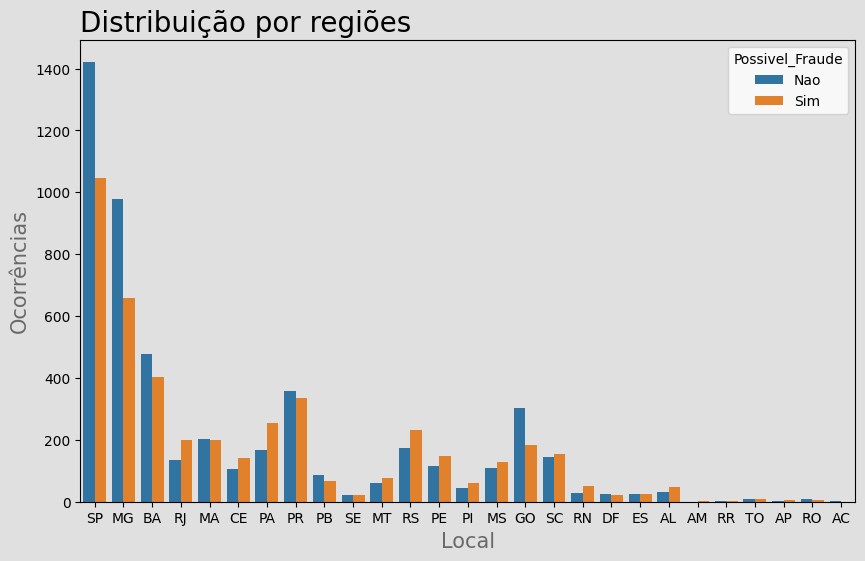

In [32]:
plt.figure(figsize=(10, 6))

sns.countplot(data=bd_novo, x="UF_Cliente", hue="Possivel_Fraude")

plt.title('Distribuição por regiões', fontsize=20, loc='left')
plt.xlabel('Local', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

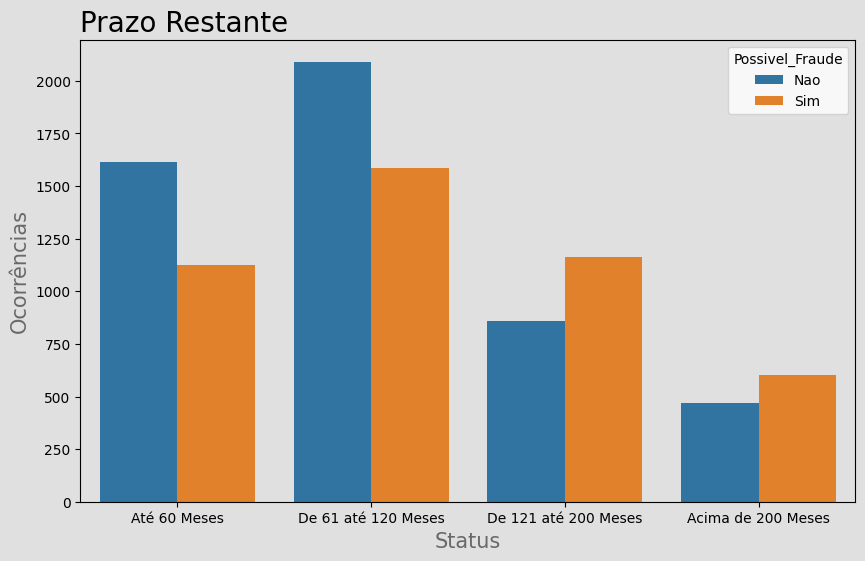

In [33]:
plt.figure(figsize=(10, 6))

sns.countplot(data=bd_novo, x="Faixa_Prazo_Restante", hue="Possivel_Fraude")

plt.title('Prazo Restante', fontsize=20, loc='left')
plt.xlabel('Status', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

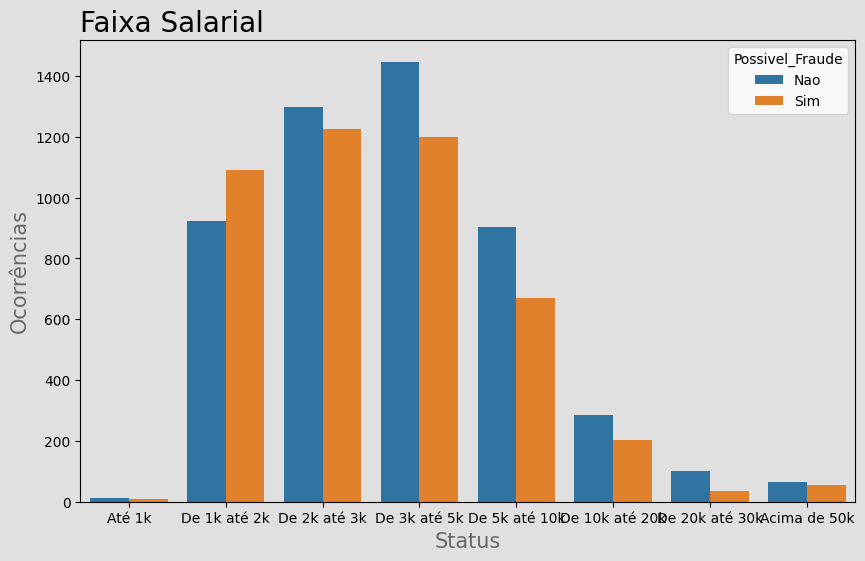

In [34]:
plt.figure(figsize=(10, 6))

sns.countplot(data=bd_novo, x="Faixa_Salarial", hue="Possivel_Fraude")

plt.title('Faixa Salarial', fontsize=20, loc='left')
plt.xlabel('Status', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

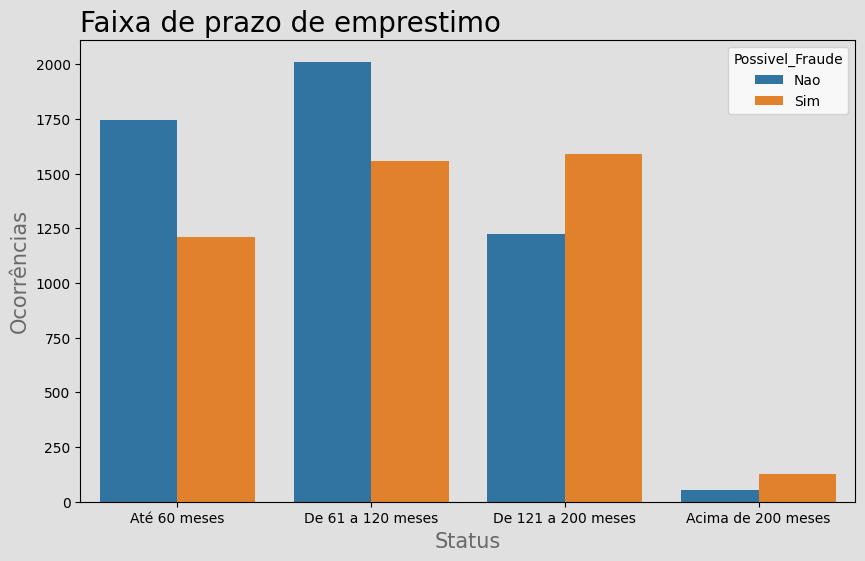

In [35]:
plt.figure(figsize=(10, 6))

sns.countplot(data=bd_novo, x="Faixa_Prazo_Emprestimo", hue="Possivel_Fraude")

plt.title('Faixa de prazo de emprestimo', fontsize=20, loc='left')
plt.xlabel('Status', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

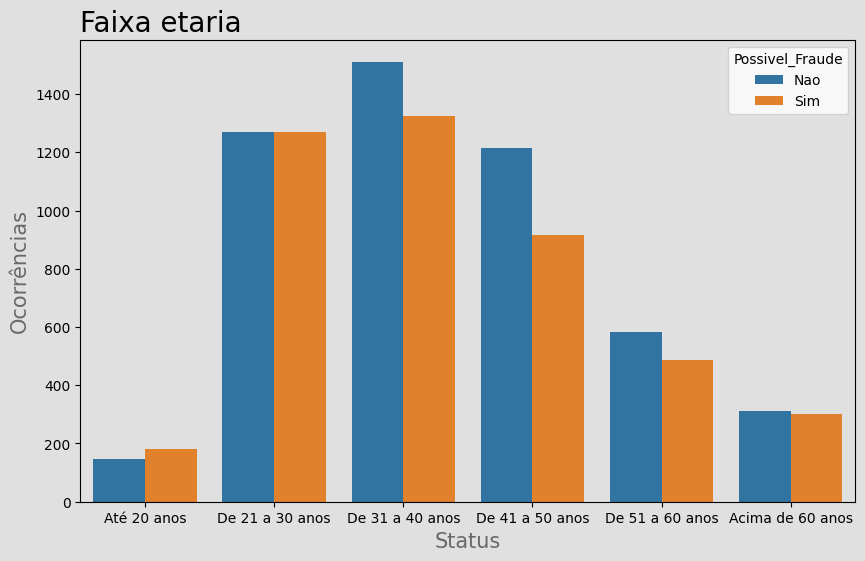

In [36]:
plt.figure(figsize=(10, 6))

sns.countplot(data=bd_novo, x="Faixa_Etaria", hue="Possivel_Fraude")

plt.title('Faixa etaria', fontsize=20, loc='left')
plt.xlabel('Status', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

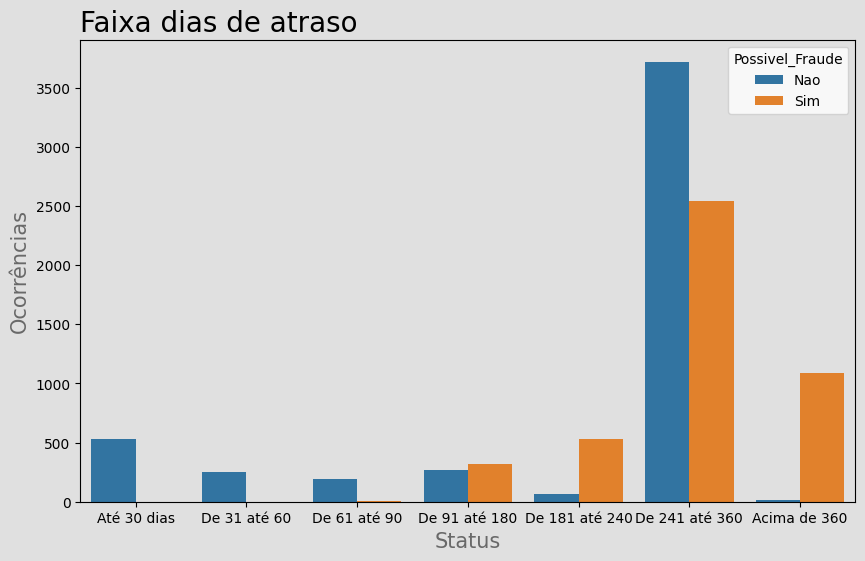

In [37]:
plt.figure(figsize=(10, 6))

sns.countplot(data=bd_novo, x="Faixa_Dias_Atraso", hue="Possivel_Fraude")

plt.title('Faixa dias de atraso', fontsize=20, loc='left')
plt.xlabel('Status', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

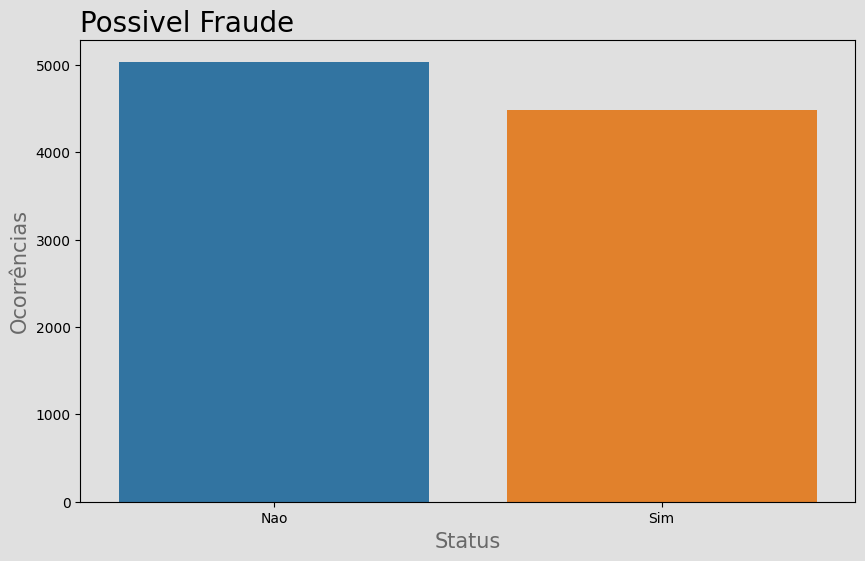

In [38]:
plt.figure(figsize=(10, 6))

sns.countplot(data=bd_novo, x="Possivel_Fraude", hue="Possivel_Fraude")

plt.title('Possivel Fraude', fontsize=20, loc='left')
plt.xlabel('Status', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

## Visualização dos dados

Dados numéricos

In [75]:
variaveis_numericas = []
for i in bd_novo.columns[0:16].tolist():
        if bd_novo.dtypes[i] == 'int64' or bd_novo.dtypes[i] == 'float64':                        
            variaveis_numericas.append(i)  

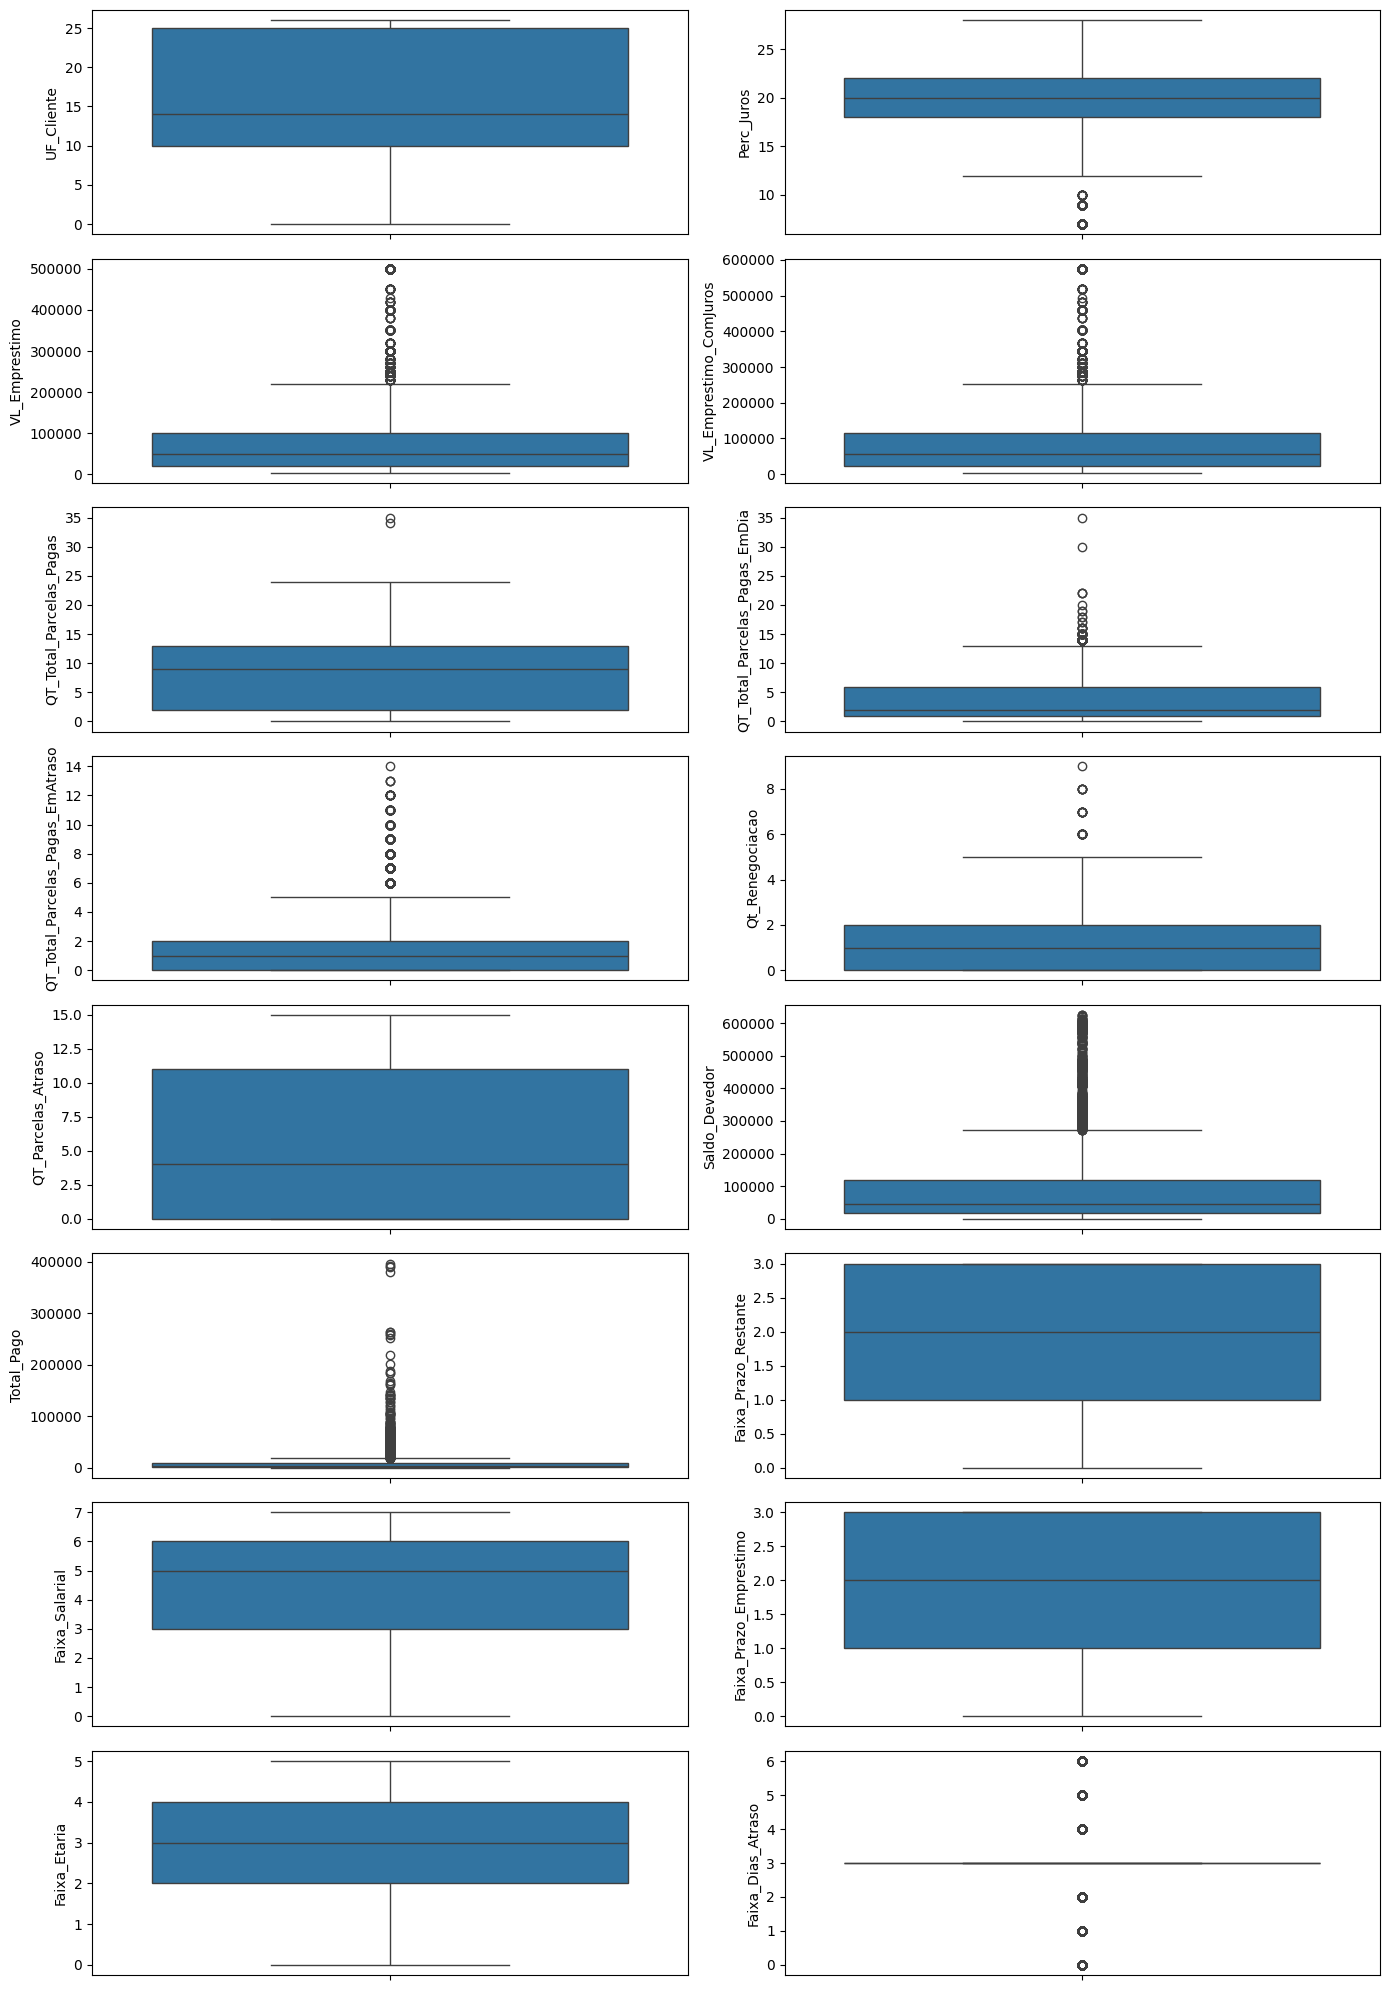

In [79]:
# Possíveis outliers.

plt.rcParams["figure.figsize"] = [14,20]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(8, 2)

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = bd_novo, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

In [41]:
# Começando o OHE

variaveis_categoricas = []
for i in bd_novo.columns[0:16].tolist(): # até o 18, pois não precisa fazer na variável alvo
        if bd_novo.dtypes[i] == 'object' or bd_novo.dtypes[i] == 'category':                        
            variaveis_categoricas.append(i)  

In [42]:
lb = LabelEncoder()

for var in variaveis_categoricas:
    bd_novo[var] = lb.fit_transform(bd_novo[var])

In [43]:
bd_novo.head()

,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Faixa_Prazo_Restante,Faixa_Salarial,Faixa_Prazo_Emprestimo,Faixa_Etaria,Faixa_Dias_Atraso,Possivel_Fraude
0,25,23.0,80000.0,92000.0,15,9,1,0,0,91759.97,7717.08,2,7,2,4,3,Nao
1,10,20.0,50000.0,57500.0,10,10,0,0,4,53981.18,6756.59,3,3,3,2,6,Nao
2,4,18.0,100000.0,115000.0,15,5,1,0,0,101150.02,17929.06,3,6,3,3,3,Nao
3,10,20.0,30000.0,34500.0,1,1,0,0,13,36208.10,369.10,3,3,3,1,0,Sim
4,10,20.0,60000.0,69000.0,16,16,0,0,0,60984.00,11845.24,3,5,3,5,3,Nao


In [44]:
bd_novo.isnull().sum()

UF_Cliente                          0
Perc_Juros                          0
VL_Emprestimo                       0
VL_Emprestimo_ComJuros              0
QT_Total_Parcelas_Pagas             0
QT_Total_Parcelas_Pagas_EmDia       0
QT_Total_Parcelas_Pagas_EmAtraso    0
Qt_Renegociacao                     0
QT_Parcelas_Atraso                  0
Saldo_Devedor                       0
Total_Pago                          0
Faixa_Prazo_Restante                0
Faixa_Salarial                      0
Faixa_Prazo_Emprestimo              0
Faixa_Etaria                        0
Faixa_Dias_Atraso                   0
Possivel_Fraude                     0
dtype: int64

In [45]:
bd_novo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   UF_Cliente                        9517 non-null   int64  
 1   Perc_Juros                        9517 non-null   float64
 2   VL_Emprestimo                     9517 non-null   float64
 3   VL_Emprestimo_ComJuros            9517 non-null   float64
 4   QT_Total_Parcelas_Pagas           9517 non-null   int64  
 5   QT_Total_Parcelas_Pagas_EmDia     9517 non-null   int64  
 6   QT_Total_Parcelas_Pagas_EmAtraso  9517 non-null   int64  
 7   Qt_Renegociacao                   9517 non-null   int64  
 8   QT_Parcelas_Atraso                9517 non-null   int64  
 9   Saldo_Devedor                     9517 non-null   float64
 10  Total_Pago                        9517 non-null   float64
 11  Faixa_Prazo_Restante              9517 non-null   int64  
 12  Faixa_

In [46]:
# A variável alvo vai precisar de um balanceamento.

bd_novo.Possivel_Fraude.value_counts()

Possivel_Fraude
Nao    5035
Sim    4482
Name: count, dtype: int64

In [47]:
# Separar variaveis preditoras e target

PREDITORAS = bd_novo.iloc[:, 0:16]  
TARGET = bd_novo.iloc[:, 16] 

In [48]:
seed = 100

balanceador = SMOTE(random_state=seed)

RES_PREDITORAS, RES_TARGET = balanceador.fit_resample(PREDITORAS, TARGET)

In [49]:
print(f'RES_PREDITORAS: {RES_PREDITORAS.shape}')
print(f'RES_TARGET: {RES_TARGET.shape}')
print('--'*30)
print(f'PREDITORAS: {PREDITORAS.shape}')
print(f'TARGET: {TARGET.shape}')

RES_PREDITORAS: (10070, 16)
RES_TARGET: (10070,)
------------------------------------------------------------
PREDITORAS: (9517, 16)
TARGET: (9517,)


In [50]:
# Mudar o test_size caso necessário

X_train, X_test, y_train, y_test = train_test_split(RES_PREDITORAS, RES_TARGET, test_size=0.33, random_state=42) 

In [51]:
# Normalização das Variáveis

Normalizador = MinMaxScaler()
X_treino_normalizados = Normalizador.fit_transform(X_train)
X_teste_normalizados = Normalizador.transform(X_test)

## Modelos de machine learning

### 1 - RadomForest

In [52]:
randomforest = RandomForestClassifier()

In [54]:
n_estimators = np.array([100,200,300])
max_depth = np.array([10,20])
criterion = np.array(["gini", "entropy"])
max_features = np.array(["sqrt", "log2", None])
min_samples_split = np.array([1,2,5])
min_samples_leaf = np.array([1,2,3])


# Grid de hiperparâmetros
grid_parametros = dict(n_estimators = n_estimators,
                       max_depth = max_depth,
                       criterion = criterion,
                       max_features = max_features,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf)

# Criando o modelo com o Grid de Hiperparametros
randomForest = GridSearchCV(randomforest, grid_parametros, cv = 3, n_jobs = 6)

# Treinando os modelos
inicio = time.time()
randomForest.fit(X_treino_normalizados, y_train)
fim = time.time()

# Obtendo e visualizando os parametros treinados
treinos_rf = pd.DataFrame(randomForest.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {randomForest.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {randomForest.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos_rf.shape[0])

Acurácia em Treinamento: 99.27%

Hiperparâmetros Ideais: {'criterion': np.str_('entropy'), 'max_depth': np.int64(20), 'max_features': 'log2', 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(2), 'n_estimators': np.int64(100)}

Tempo de Treinamento do Modelo:  96.4

Numero de treinamentos realizados:  324


In [55]:
# Criando o classificador com Random Forest
clf = RandomForestClassifier(n_estimators  = 100, criterion = 'entropy', max_depth = 10, 
                             max_features = 'log2', min_samples_leaf = 1, min_samples_split = 2, n_jobs = 6)


# Construção do modelo
clf = clf.fit(X_treino_normalizados, y_train)


In [56]:
scores = clf.score(X_treino_normalizados,y_train)
print(f"Score com os melhores hiperparâmetros de treino: {scores :.2%}")

Score com os melhores hiperparâmetros de treino: 100.00%


In [57]:
scores = clf.score(X_teste_normalizados,y_test)
print(f"Score com os melhores hiperparâmetros de teste: {scores :.2%}")

Score com os melhores hiperparâmetros de teste: 98.92%


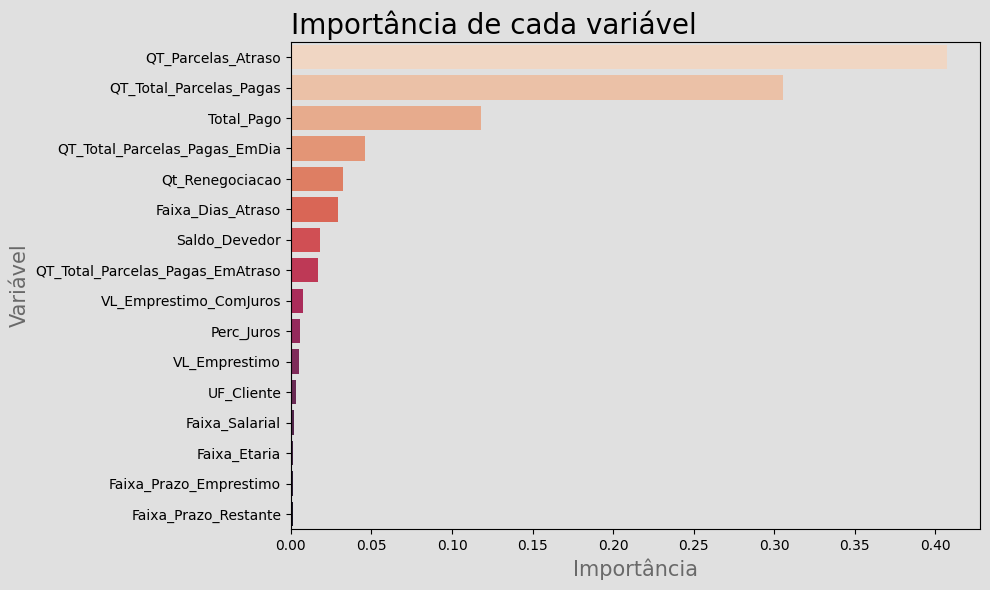

In [64]:
plt.figure(figsize=(10, 6))

importances = pd.Series(data=clf.feature_importances_, index=PREDITORAS.columns)
importances = importances.sort_values(ascending=False)
sns.barplot(x=importances, y=importances.index, orient='h', palette='rocket_r')

plt.title('Importância de cada variável', fontsize=20, loc='left')
plt.xlabel('Importância', fontsize=15, color='#696969')
plt.ylabel('Variável', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

In [65]:
importances.sort_values(ascending = False)

QT_Parcelas_Atraso                  0.407319
QT_Total_Parcelas_Pagas             0.305395
Total_Pago                          0.117739
QT_Total_Parcelas_Pagas_EmDia       0.046136
Qt_Renegociacao                     0.032096
Faixa_Dias_Atraso                   0.029209
Saldo_Devedor                       0.018122
QT_Total_Parcelas_Pagas_EmAtraso    0.017113
VL_Emprestimo_ComJuros              0.007241
Perc_Juros                          0.005902
VL_Emprestimo                       0.004975
UF_Cliente                          0.002905
Faixa_Salarial                      0.001917
Faixa_Etaria                        0.001530
Faixa_Prazo_Emprestimo              0.001222
Faixa_Prazo_Restante                0.001180
dtype: float64

### SVC